In [1]:
import numpy as np

In [71]:
import numpy as np
def distance (X1, X2):
    return np.sum((X1 - X2)**2)

class Kmeans:
    def __init__(self, k=1):
        self.k = k
        self.X_data = None
        self.clusters = None

    def fit(self, X_data ):
        # initialize cluster, k
        choices = np.random.choice (X_data.shape[0], self.k, replace=False)
        self.clusters = X_data[choices]
        self.cluster_assign = []


    def predict(self, num_iterations=1000):
        for iteraion in range(num_iterations):
            self.cluster_assign = []
            for data in X_data:
                data_cluster_distance = []
                for k_cluster in self.clusters:
                    data_cluster_distance.append( distance(data, k_cluster))
                min_cluster = np.argmin(data_cluster_distance)
                self.cluster_assign.append(min_cluster)
            new_clusters = []
            for k in range(self.k):
#                 import pdb; pdb.set_trace()
                cluster_k = X_data[np.array(self.cluster_assign) == k]
#                 print (cluster_k)
                if len(cluster_k) > 0:
                    new_clusters.append(np.mean(cluster_k, axis=0))
            if np.array_equal (new_clusters, self.clusters):
                print ("break ")
                break 
            self.clusters = new_clusters
            
            # check for loss
            loss = 0
            for k in range(len(self.clusters)):
                x_cluster = X_data[np.array(self.cluster_assign) == k]
                for X in x_cluster:
                    loss += distance (X, self.clusters[k])                
            print (iteraion, loss)


## Test on random data

In [84]:
N, D = 1000, 2

kmeans = Kmeans(k=3)
X_data = np.random.randn(N, D)
kmeans.fit(X_data)
kmeans.predict(num_iterations=1000)

0 938.9108634088379
1 926.5921440507796
2 923.0629907588891
3 920.9090806166633
4 919.3088547997022
5 917.6391323775612
6 916.4630510637091
7 915.5265166682995
8 914.8367470955093
9 913.6979797150096
10 911.4722551074602
11 907.9601058904219
12 905.5807380111876
13 903.5372252492915
14 901.6888088171456
15 900.0935650327132
16 899.0701178001776
17 898.2168428448546
18 898.0428399532907
19 898.0195790763021
20 897.8457130472094
break 


## Visualize

In [85]:
clusters = np.array(kmeans.clusters)

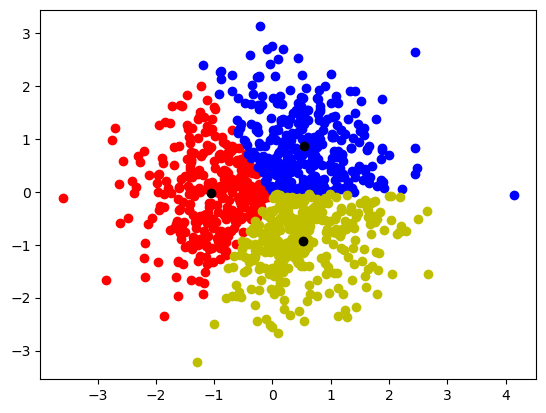

In [87]:
from matplotlib import pyplot as plt
colors = ['r', 'b', 'y']

for k in range(kmeans.k):
    plt.scatter(X_data[np.where(np.array(kmeans.cluster_assign) == k)][:,0],
                X_data[np.where(np.array(kmeans.cluster_assign) == k)][:,1],
                color=colors[k])
plt.scatter(clusters[:,0], clusters[:,1], color='black', marker='o')
    
plt.show()    

In [ ]:
from matplotlib import pyplot as plt
# Plot the data points with different colors based on their cluster assignments
colors = ['r', 'b']
for i in range(kmeans.k):
    plt.scatter(X_data[np.where(np.array(cluster_assignments) == i)][:,0], 
                X[np.where(np.array(cluster_assignments) == i)][:,1], 
                color=colors[i])

# Plot the centroids as black circles
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], color='black', marker='o')

# Show the plot
plt.show()